In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tesla-stock-data/TSLA.csv


In [2]:
import pandas as pd
filename = "/kaggle/input/tesla-stock-data/TSLA.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


# <center>1. Tesla Closing Prices Over Time </center>

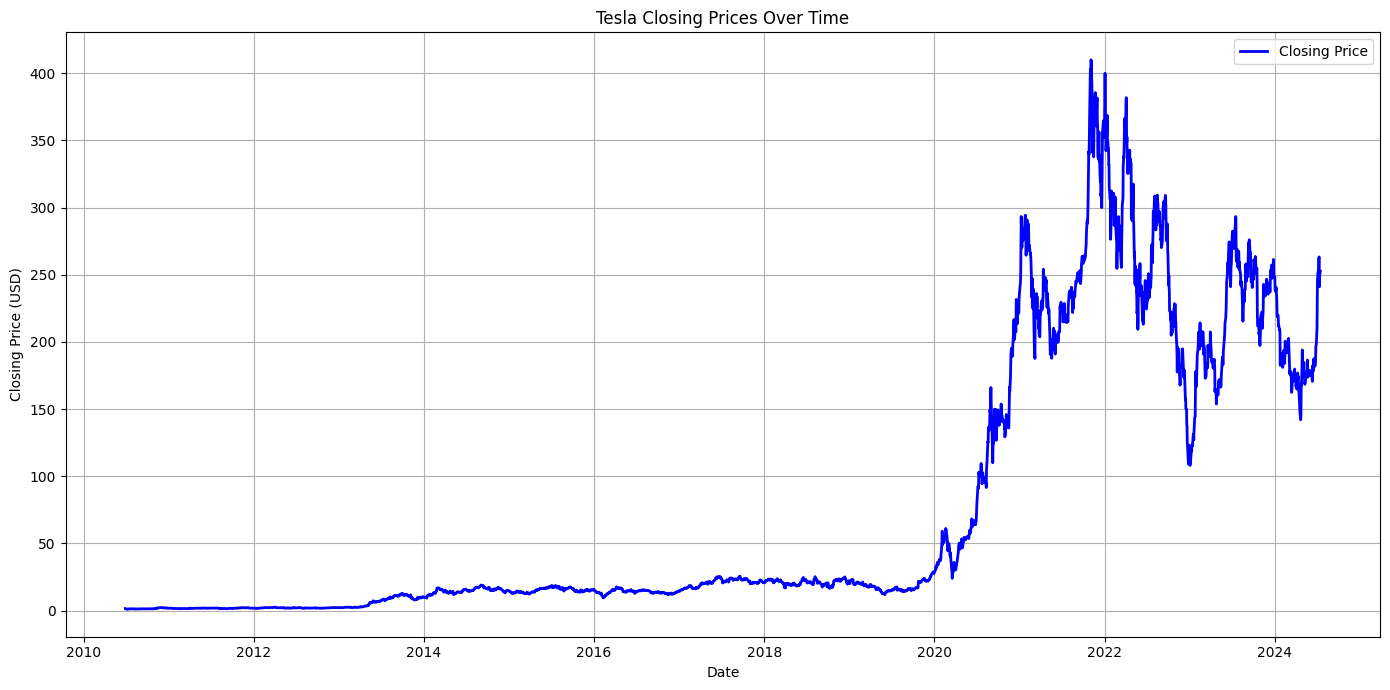

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', linewidth=2)
plt.title('Tesla Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <center> 2. Tesla Price Range (High-Low) Over Time </center>

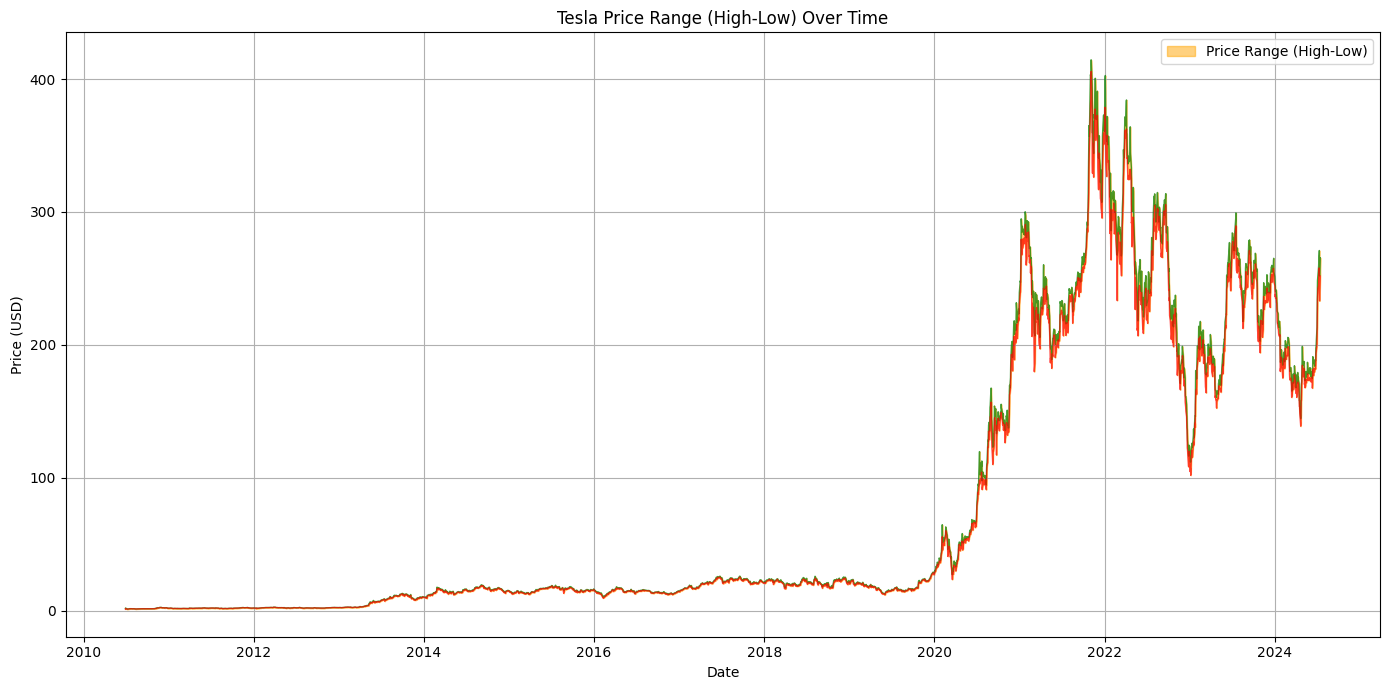

In [4]:
plt.figure(figsize=(14, 7))
plt.fill_between(df['Date'], df['High'], df['Low'], color='orange', alpha=0.5, label='Price Range (High-Low)')
plt.plot(df['Date'], df['High'], color='green', linewidth=1, alpha=0.7)
plt.plot(df['Date'], df['Low'], color='red', linewidth=1, alpha=0.7)
plt.title('Tesla Price Range (High-Low) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <center> 3. Tesla Trading Volume Over Time </center>

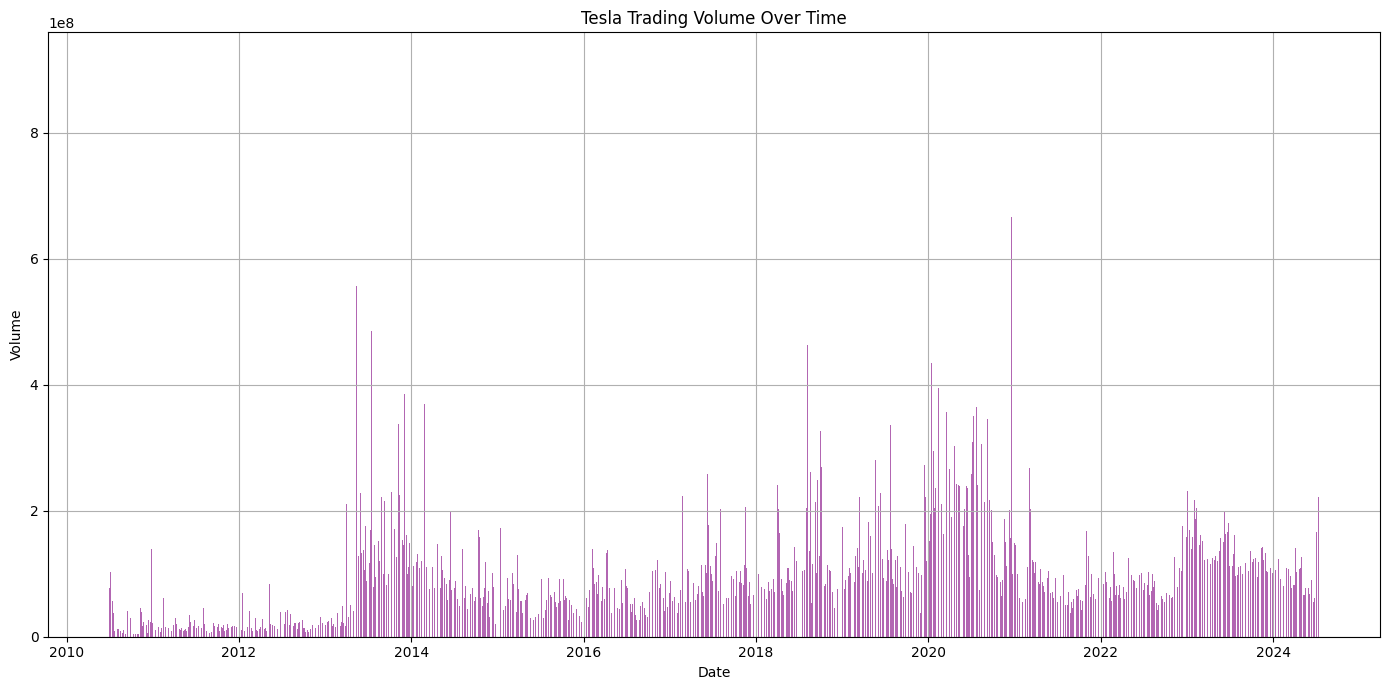

In [5]:
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Volume'], color='purple', alpha=0.6)
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center> 4. Tesla Closing Prices with 30-Day Simple Moving Average </center>

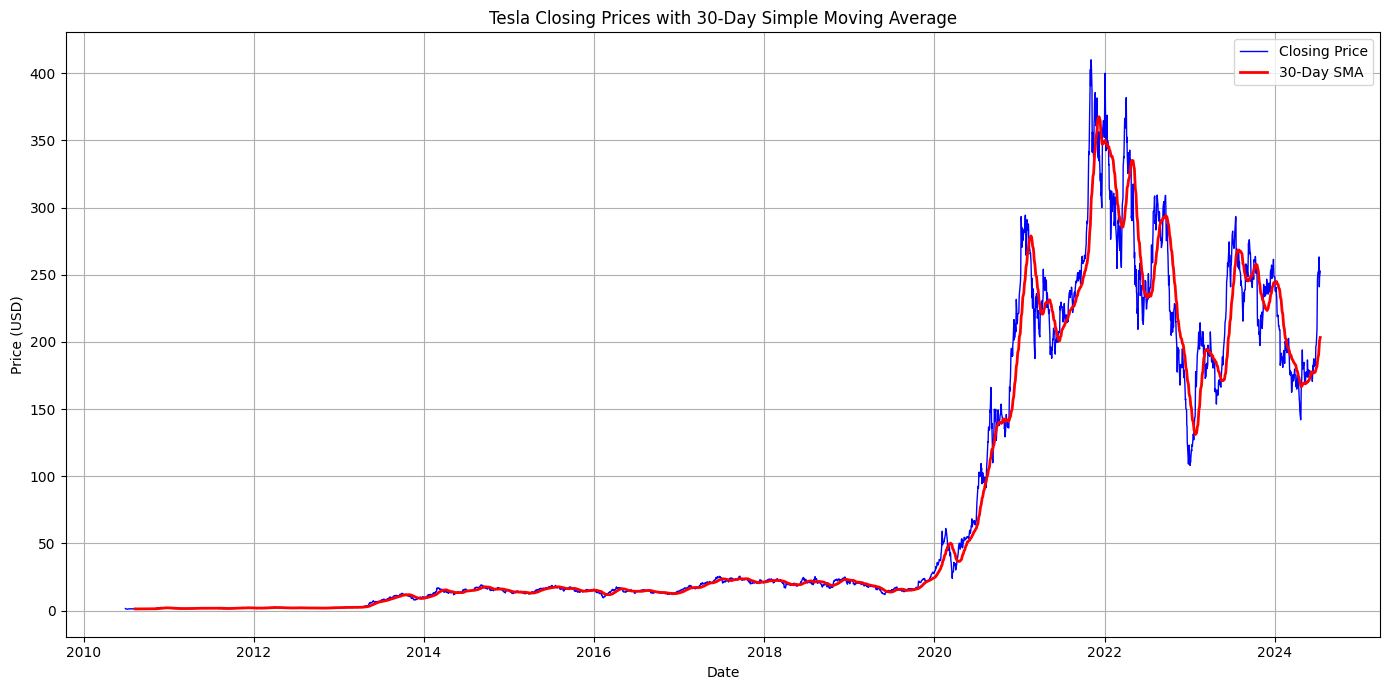

In [6]:
import numpy as np

df['SMA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', linewidth=1)
plt.plot(df['Date'], df['SMA_30'], label='30-Day SMA', color='red', linewidth=2)
plt.title('Tesla Closing Prices with 30-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <center>5. Histogram of Daily Price Changes  </center>

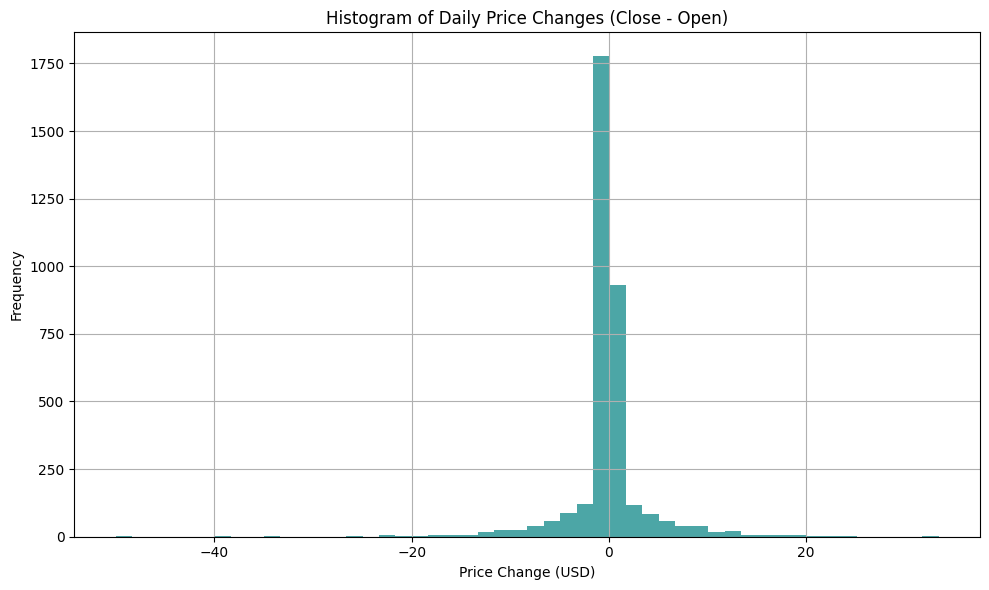

In [7]:
df['Daily Change'] = df['Close'] - df['Open']

plt.figure(figsize=(10, 6))
plt.hist(df['Daily Change'], bins=50, color='teal', alpha=0.7)
plt.title('Histogram of Daily Price Changes (Close - Open)')
plt.xlabel('Price Change (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center>6. Price Range vs Trading Volume </center>

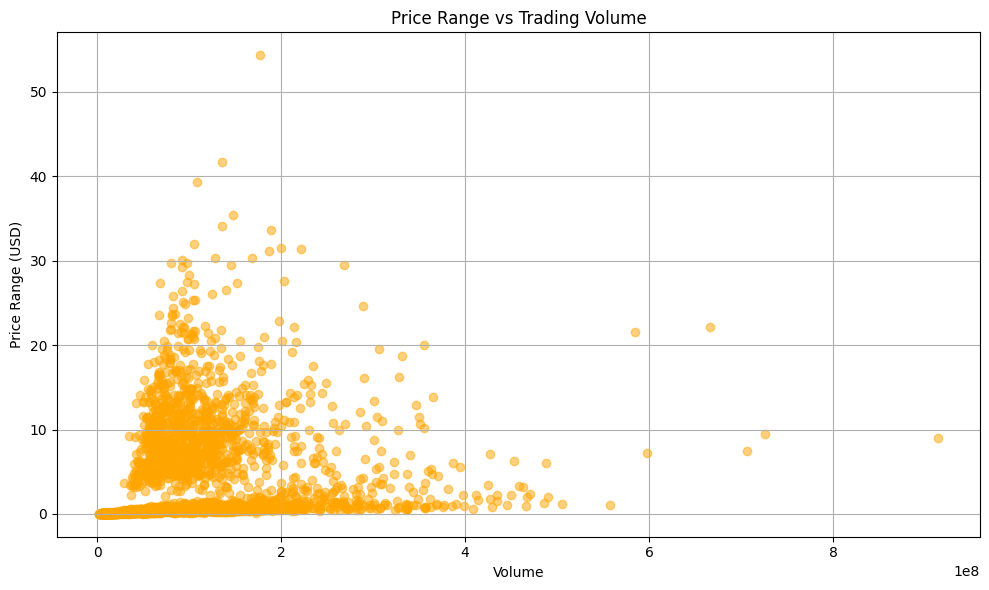

In [8]:
df['Price Range'] = df['High'] - df['Low']

plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Price Range'], alpha=0.5, color='orange')
plt.title('Price Range vs Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Price Range (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center>7. Correlation Matrix of Tesla Stock Data</center>

In [9]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


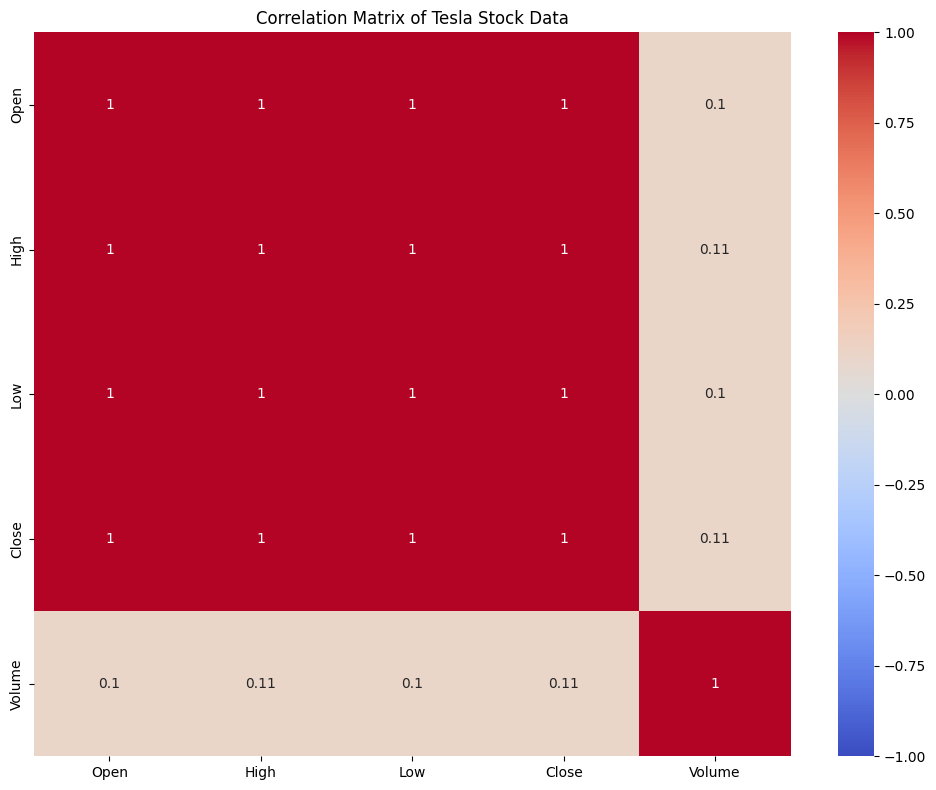

In [10]:
import seaborn as sns
import matplotlib.dates as mdates
import mplfinance as mpf

plt.figure(figsize=(10, 8))
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Tesla Stock Data')
plt.tight_layout()
plt.show()

# <center>8. Tesla Candlestick Chart</center>

/opt/conda/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


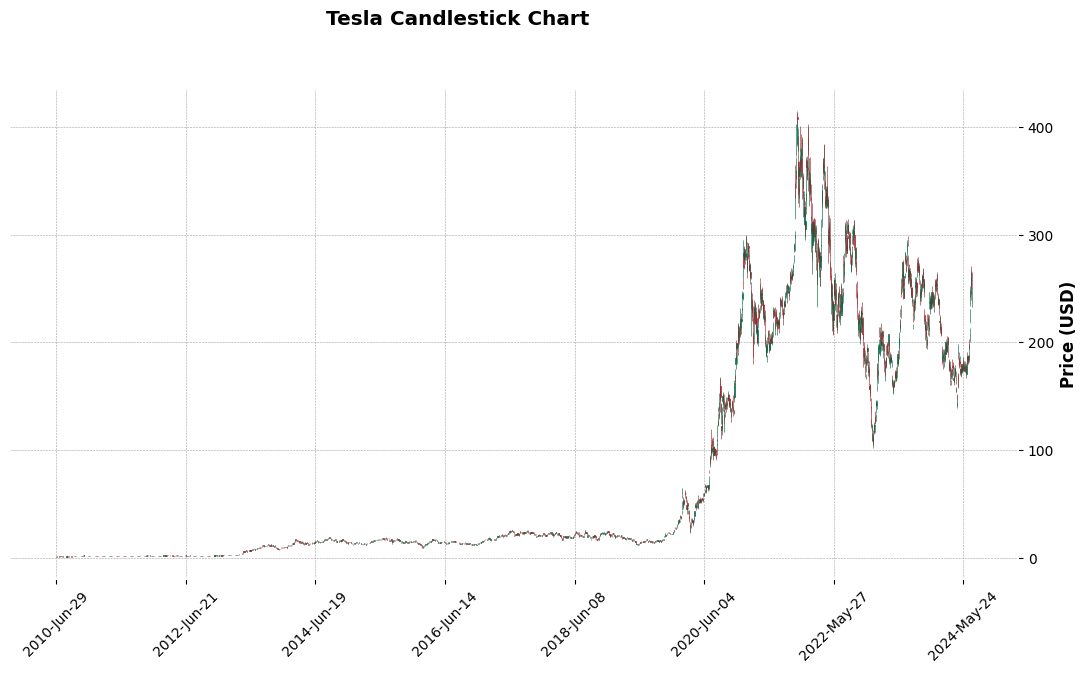

In [11]:
df_candle = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_candle.set_index('Date', inplace=True)

mpf.plot(df_candle, type='candle', style='charles', title='Tesla Candlestick Chart', ylabel='Price (USD)', figsize=(14, 7))


# <center>9. Volume Z-Score for Tesla Stock</center>

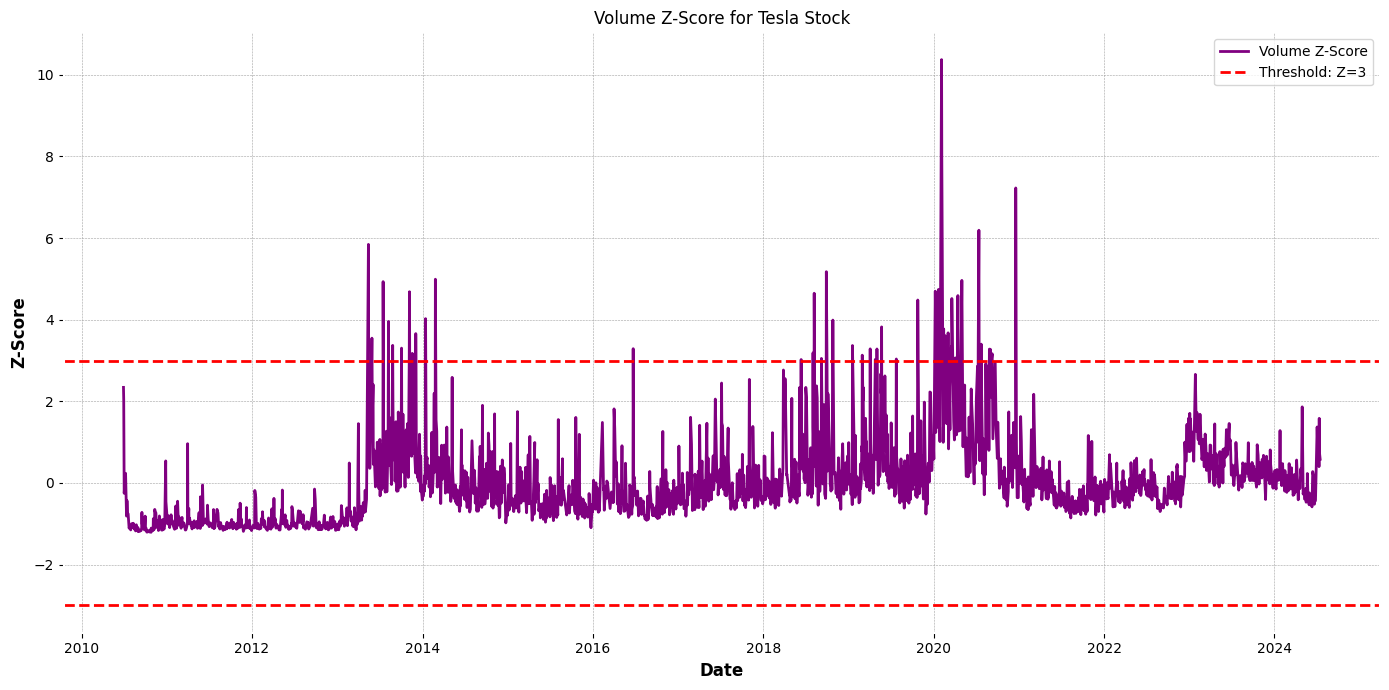

In [12]:
df['Volume Z-Score'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volume Z-Score'], label='Volume Z-Score', color='purple')
plt.axhline(y=3, color='red', linestyle='--', label='Threshold: Z=3')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title('Volume Z-Score for Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# <center>10. Average Tesla Closing Price by Month </center>

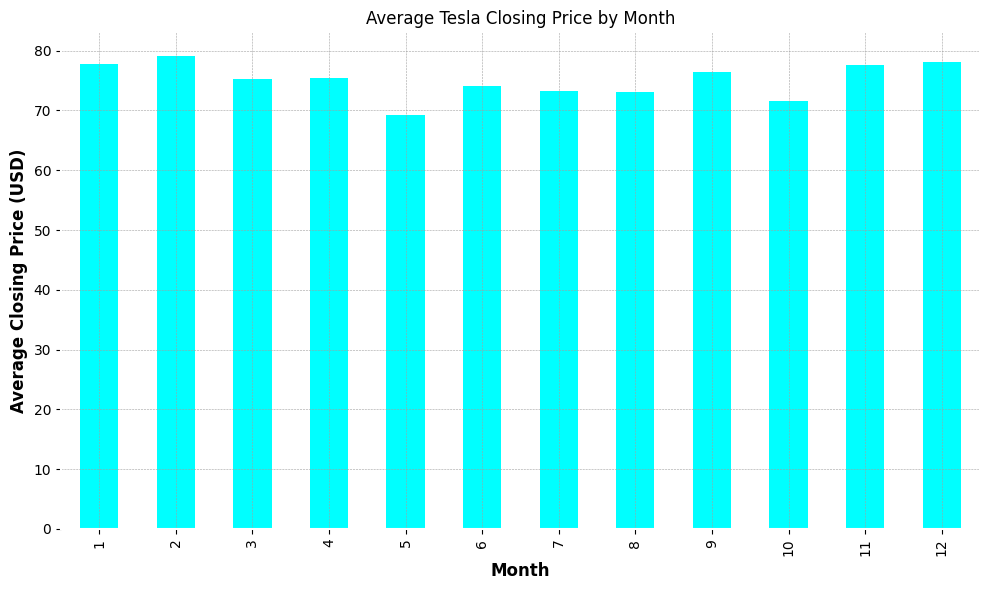

In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day of Week'] = df['Date'].dt.day_name()

monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='cyan')
plt.title('Average Tesla Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center>11.  Average Tesla Closing Price by Day of the Week</center>

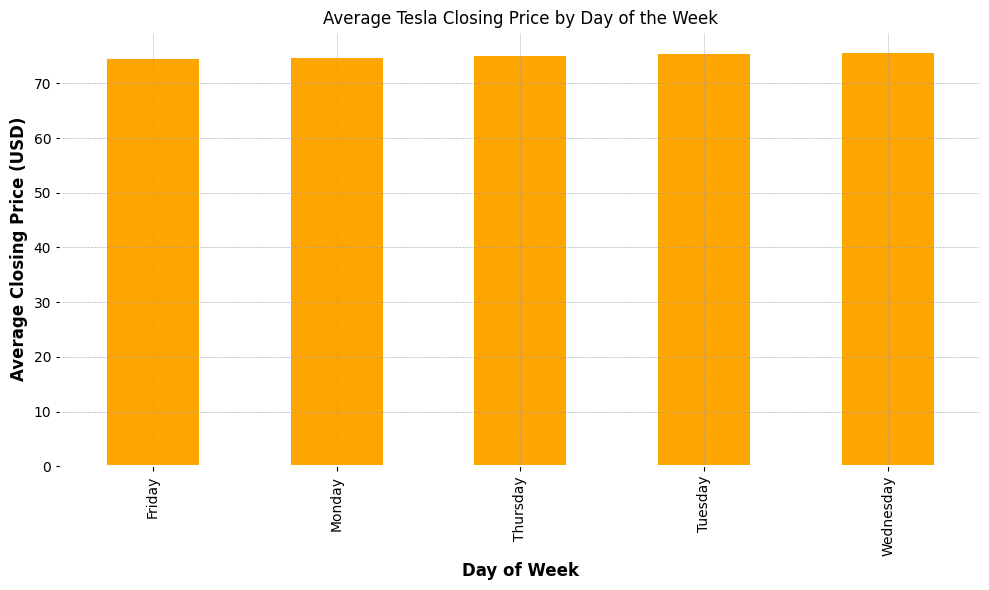

In [14]:
weekly_avg = df.groupby('Day of Week')['Close'].mean()

plt.figure(figsize=(10, 6))
weekly_avg.plot(kind='bar', color='orange')
plt.title('Average Tesla Closing Price by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center>12. Tesla Closing Prices by Month (Boxplot)</center>

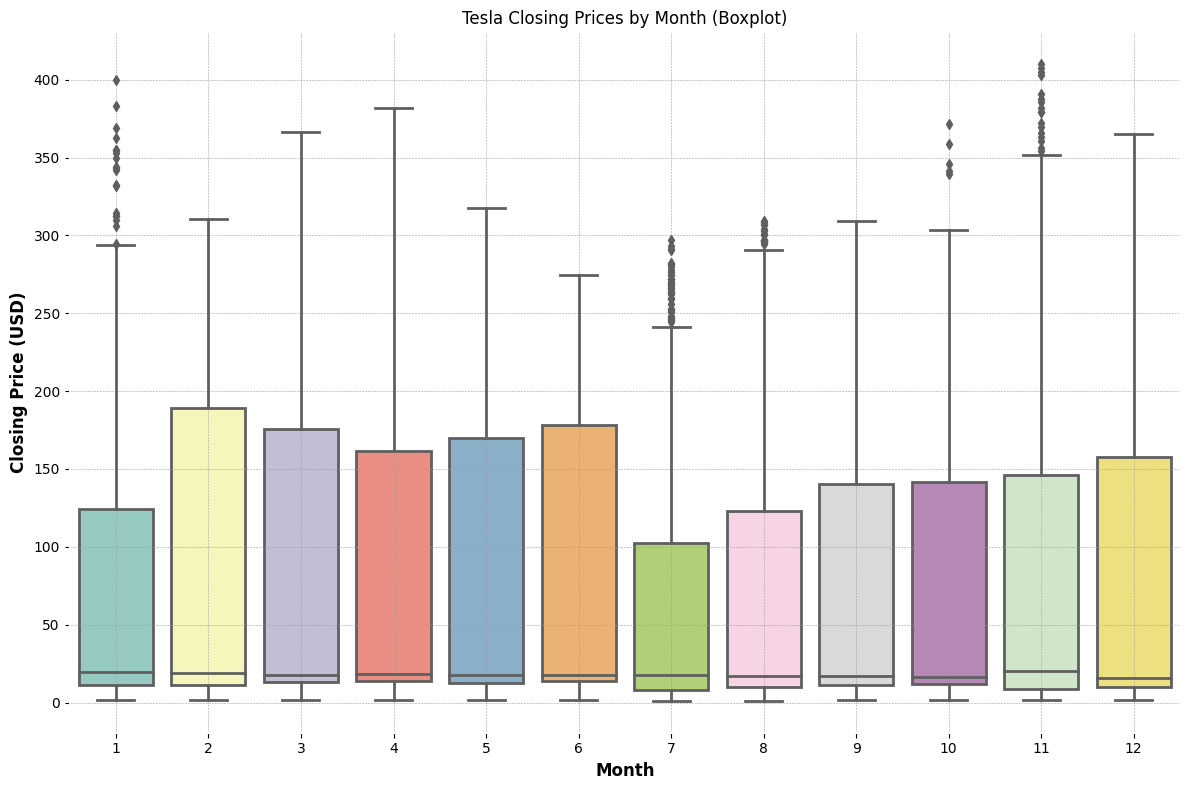

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Close', data=df, palette='Set3')
plt.title('Tesla Closing Prices by Month (Boxplot)')
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center>13. Tesla Closing Prices with Linear Regression Trend </center>

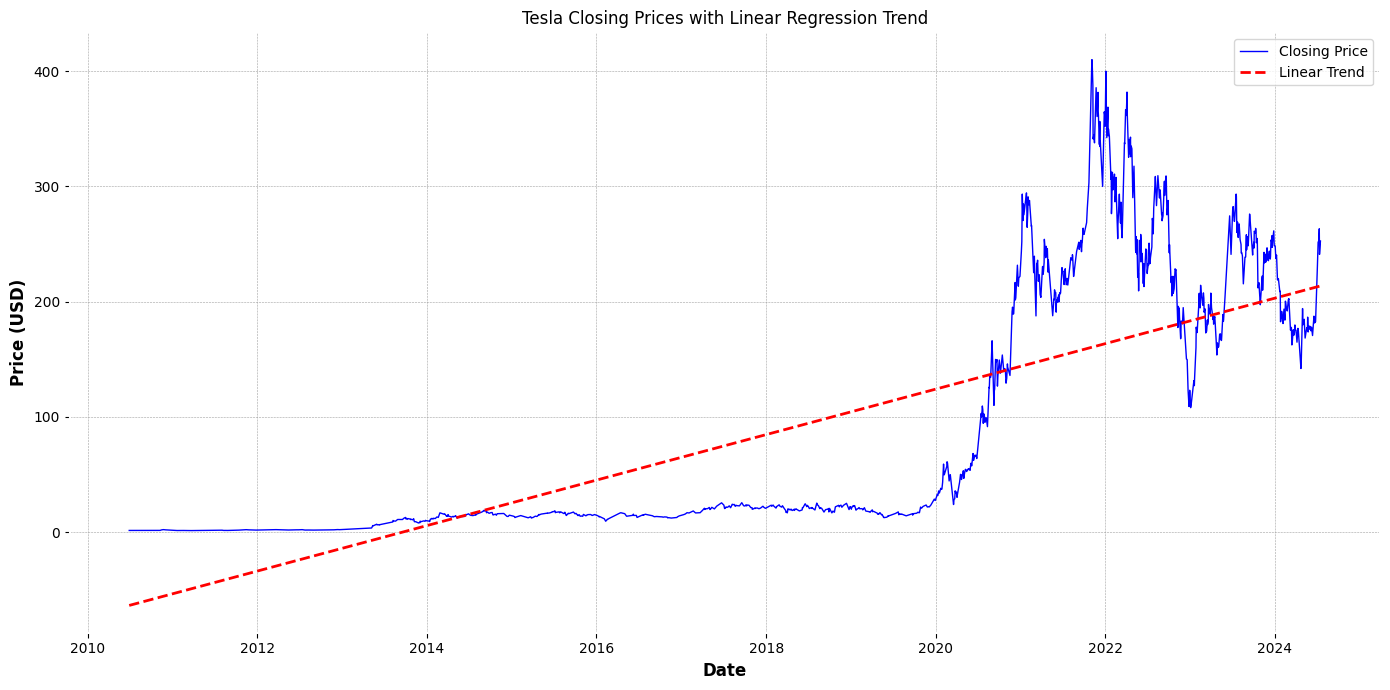

In [16]:
from sklearn.linear_model import LinearRegression

df['Date_ordinal'] = pd.to_datetime(df['Date']).map(lambda date: date.toordinal())
X = df['Date_ordinal'].values.reshape(-1, 1)
y = df['Close'].values

model = LinearRegression()
model.fit(X, y)

df['Trend'] = model.predict(X)

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', linewidth=1)
plt.plot(df['Date'], df['Trend'], label='Linear Trend', color='red', linestyle='--', linewidth=2)
plt.title('Tesla Closing Prices with Linear Regression Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <center> 14. Tesla 30-Day Rolling Standard Deviation </center>

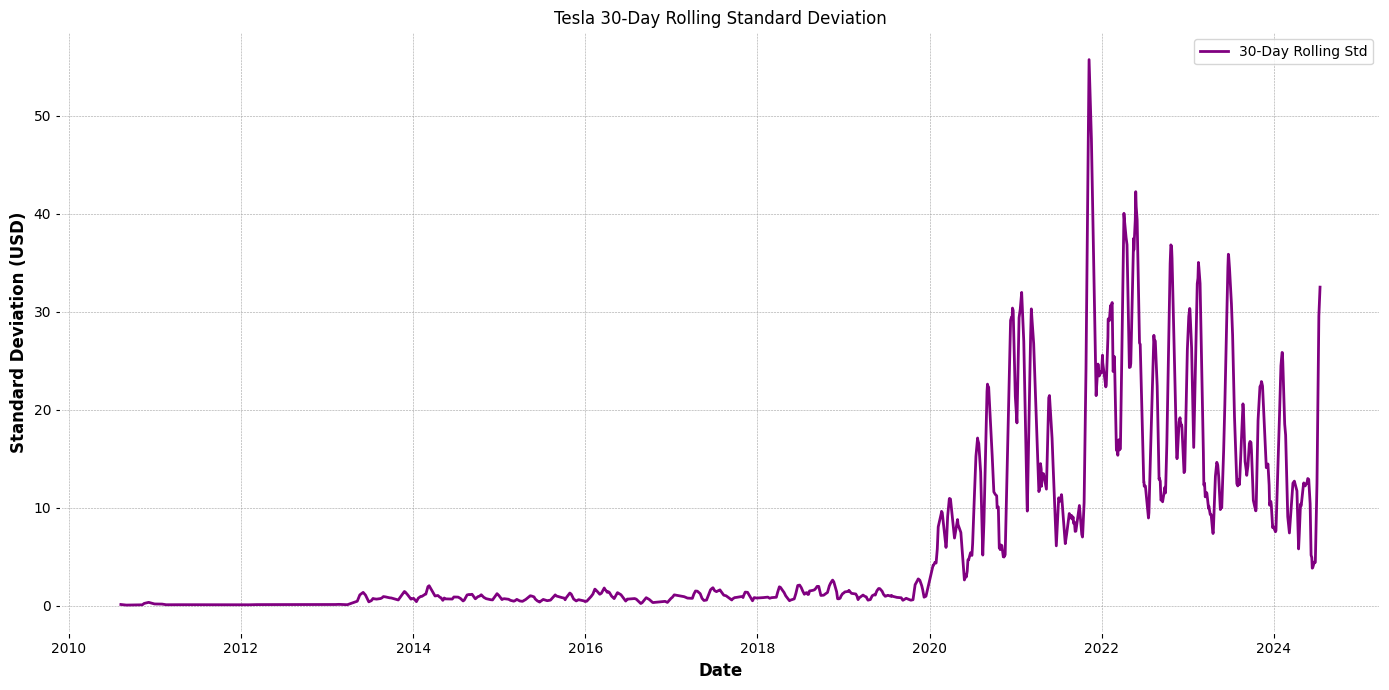

In [17]:
df['Rolling Std (30 days)'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Rolling Std (30 days)'], label='30-Day Rolling Std', color='purple')
plt.title('Tesla 30-Day Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <center> 15. Tesla MACD and Signal Line</center>

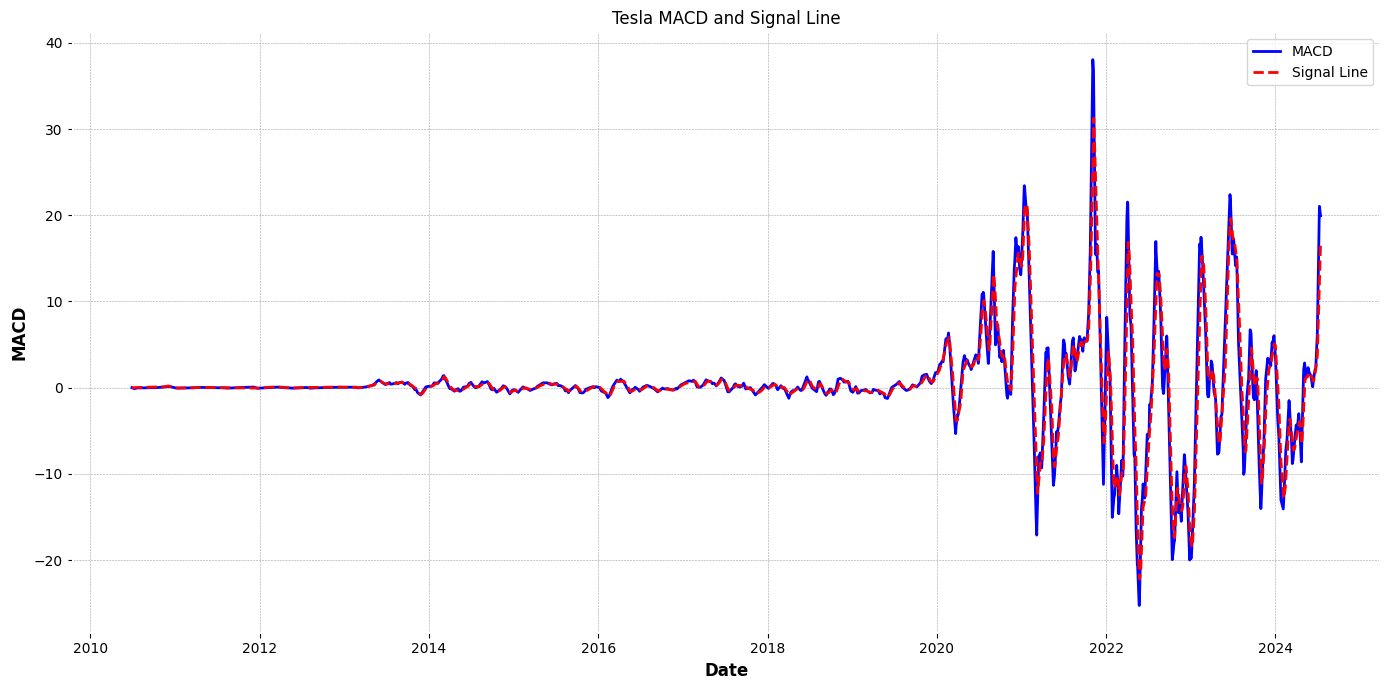

In [18]:
df['12-Day EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26-Day EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12-Day EMA'] - df['26-Day EMA']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal Line'], label='Signal Line', color='red', linestyle='--')
plt.title('Tesla MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <center> 16. Tesla Volume Profile</center>

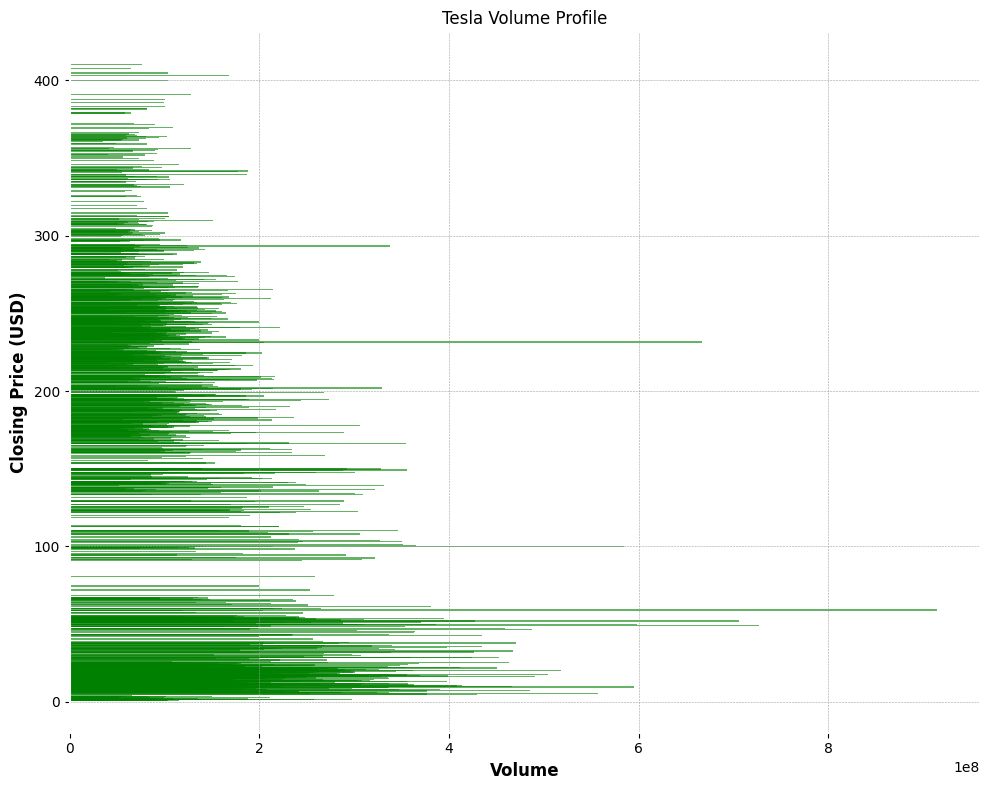

In [19]:
from collections import defaultdict

volume_profile = defaultdict(float)
for i, row in df.iterrows():
    volume_profile[row['Close']] += row['Volume']

sorted_volume_profile = dict(sorted(volume_profile.items()))

plt.figure(figsize=(10, 8))
plt.barh(list(sorted_volume_profile.keys()), list(sorted_volume_profile.values()), color='green', alpha=0.6)
plt.title('Tesla Volume Profile')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.tight_layout()
plt.show()

# <center> 17. Daily Percentage Change in Tesla Closing Prices</center>

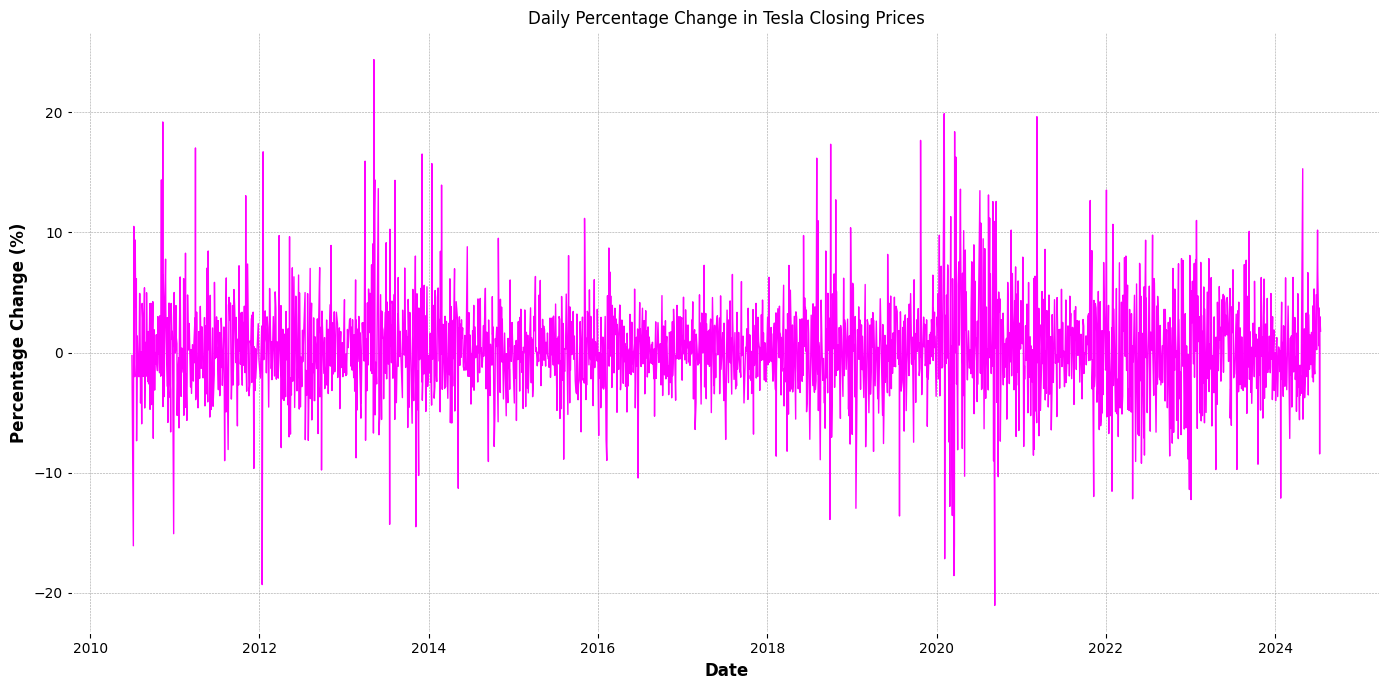

In [20]:
df['Daily Percentage Change'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily Percentage Change'], color='magenta', linewidth=1)
plt.title('Daily Percentage Change in Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center> 18. Tesla Price Levels with Highest Trading Volume (Binned)</center>

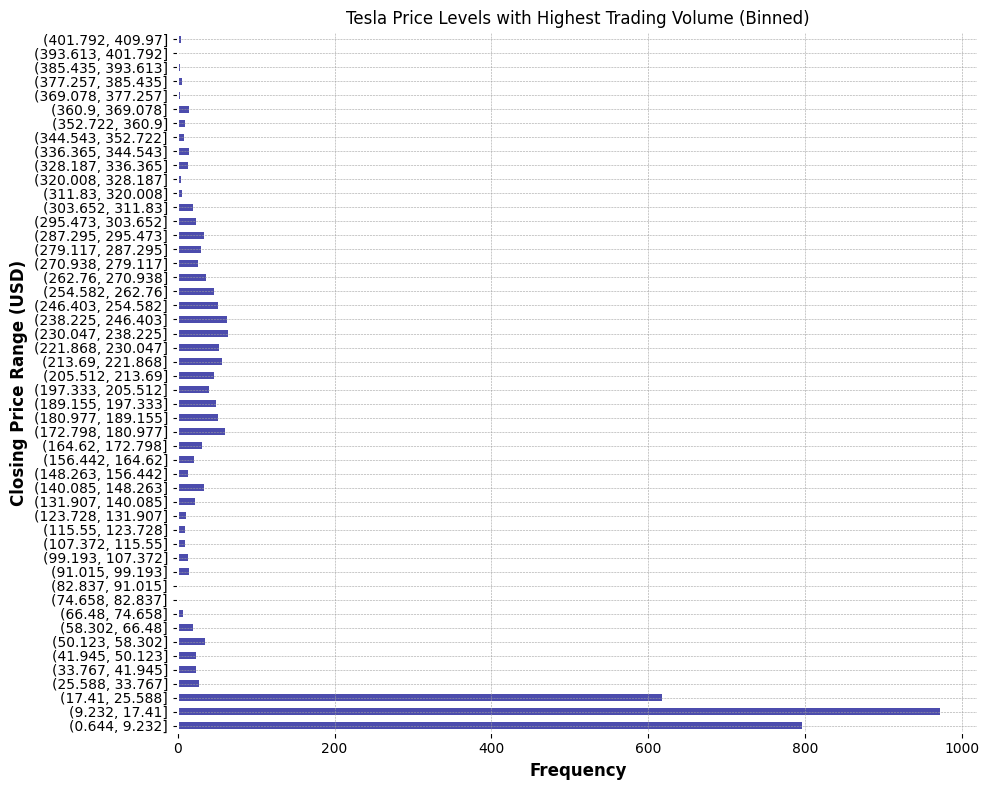

In [21]:
num_bins = 50

df['Close Binned'] = pd.cut(df['Close'], bins=num_bins)

price_bins = df['Close Binned'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
price_bins.plot(kind='barh', color='darkblue', alpha=0.7)
plt.title('Tesla Price Levels with Highest Trading Volume (Binned)')
plt.xlabel('Frequency')
plt.ylabel('Closing Price Range (USD)')
plt.tight_layout()
plt.show()

# <center> 19. Tesla Accumulation/Distribution Line  </center>

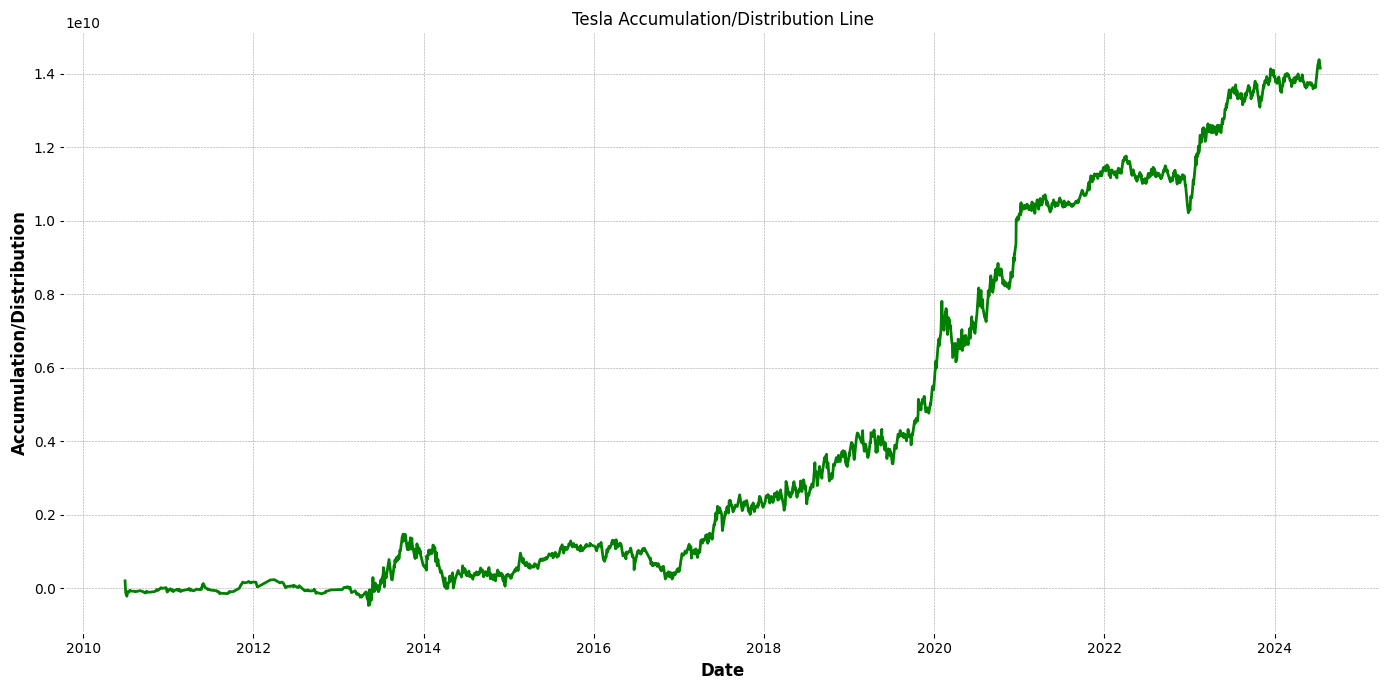

In [22]:
df['ADL'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low']) * df['Volume']
df['ADL_Cumulative'] = df['ADL'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['ADL_Cumulative'], color='green', linewidth=2)
plt.title('Tesla Accumulation/Distribution Line')
plt.xlabel('Date')
plt.ylabel('Accumulation/Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center> 20.  K-Means Clustering of Tesla Closing Prices </center>

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


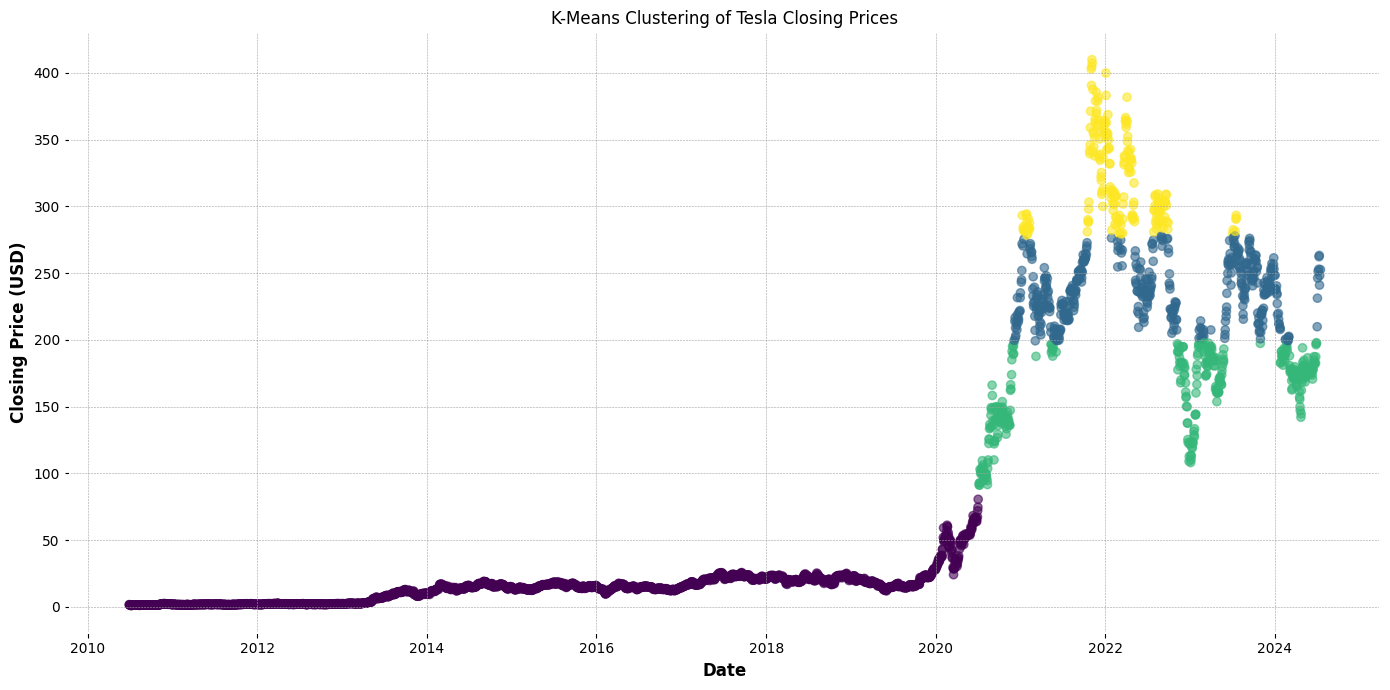

In [23]:
from sklearn.cluster import KMeans

num_clusters = 4

df['Close_normalized'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()
kmeans = KMeans(n_clusters=num_clusters)
df['Cluster'] = kmeans.fit_predict(df[['Close_normalized']])

plt.figure(figsize=(14, 7))
plt.scatter(df['Date'], df['Close'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 

-----------

# <center> If you liked the code, please make an ⬆️ upvote  ⬆️  </center>

--------